<a href="https://colab.research.google.com/github/Joshmen06/NLP-Project/blob/main/02_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [4]:
filtered_data = pd.read_csv('/content/Reviews.csv')

In [5]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
def partition(x):
    if x < 3:
        return 0
    return 1

In [7]:
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

Number of data points in our data (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [8]:
subset = {"UserId", "ProfileName", "Time", "Text"}
data = filtered_data.drop_duplicates(subset=subset, keep="first")
print(data.shape)
data.head(3)

(393933, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [9]:
(data['Id'].size)/(filtered_data['Id'].size)*100

69.29901100176971

In [10]:
data[data['HelpfulnessNumerator'] > data['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [11]:
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]
data.reset_index(drop = True, inplace=True)
print(data.shape)
data.head(3)

(393931, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [12]:
miss_val = data.isna().sum()
miss_val

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    3
Text                       0
dtype: int64

In [13]:
print(data['Score'].value_counts())
print("*"*50)


1    336823
0     57108
Name: Score, dtype: int64
**************************************************


Text(0.5, 1.0, 'Score distribution')

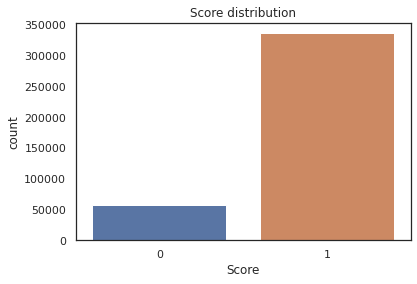

In [14]:
sns.countplot('Score',data = data)
plt.title("Score distribution")

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import re
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))


In [19]:
sno = nltk.stem.SnowballStemmer('english')                      


In [20]:
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext


In [21]:
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [22]:
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)

In [24]:
data['CleanedText'] = data['Text'].apply(final_sentence)
print(data.shape)
data.head()

(393931, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted peanuts a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around pillowy citrus gelatin nuts ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient Robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great wide assortment yummy Delive...


In [25]:
def Text_Into_Vector(model,data):
    model_vect = model(ngram_range=(1,2)) #in scikit-learn
    final_array = model_vect.fit_transform(data.values)

    print("the type of count vectorizer ",type(final_array))
    print("the shape of out text BOW vectorizer ",final_array.get_shape())
    print("the number of unique words including both unigrams and bigrams ", final_array.get_shape()[1])
    
    return model_vect, final_array

In [26]:
from sklearn.model_selection import train_test_split

def Split_data(x_vec, y_vec):
    X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=0)
    X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train, Y_train, test_size=.33, random_state=0)
    return X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

def Normalization(train, cv, test):
    train=preprocessing.normalize(train)
    cv=preprocessing.normalize(cv)
    test=preprocessing.normalize(test)

    print("Train Data Size ",train.get_shape())
    print("CV Data Size: ",cv.shape)
    print("Test Data Size: ",test.shape)
    
    return train, cv, test

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pylab as pyplt

def Multinomial_NB(X_train,X_cv,Y_train,Y_cv):
    #############################################################################
    best_alpha=0
    max_roc_auc=-1
    pred_cv = []
    pred_train = []
    alpha=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
    #############################################################################

    for i in alpha:
        mulbnb = MultinomialNB(alpha=i)
        mulbnb.fit(X_train,Y_train)
        probs = mulbnb.predict_proba(X_cv)[:,1]     
        prob = mulbnb.predict_proba(X_train)[:,1]
        #############################################################################

        auc_score_cv = roc_auc_score(Y_cv,probs)            #auc roc for cv
        auc_score_train = roc_auc_score(Y_train,prob)       #auc roc for train
        #############################################################################

        print(i," ------> ",auc_score_cv)
        #############################################################################

        pred_cv.append(auc_score_cv)
        pred_train.append(auc_score_train)
        #############################################################################

        if(max_roc_auc<auc_score_cv):
            max_roc_auc=auc_score_cv
            best_alpha=i

    print("*"*100)
    print(f"\n Best alpha Value {best_alpha} with highest roc_auc Score is {max_roc_auc}")
    print("*"*100)
    #############################################################################

    sns.set_style("darkgrid")
    plt.xscale('log')
    plt.plot(alpha, pred_cv,'r-', label = 'CV Data')
    plt.plot(alpha,pred_train,'g-', label ='Train Data')
    plt.legend(loc='upper right')
    plt.title(r'Auc Score v/s $\alpha$')
    plt.xlabel(r"alpha values",fontsize=12)
    plt.ylabel("roc_auc",fontsize=12)
    plt.show()
    print("*"*100)
    #############################################################################

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_cv,probs)
    # plot no skill
    pyplt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplt.plot(fpr, tpr, marker='.')
    pyplt.title("Line Plot of ROC Curve on Train Data")
    pyplt.ylabel('True Positive Rate')
    pyplt.xlabel('False Positive Rate')
    pyplt.show()
    print("*"*100)
    
    #############################################################################
    return best_alpha

In [29]:
import scikitplot.metrics as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


def Testing_model(X_train,Y_train,X_test,Y_test,best_alpha):
    
    #############################################################################
    bnb = MultinomialNB(alpha = best_alpha, fit_prior=True, class_prior=None)
    bnb.fit(X_train,Y_train)
    probs = bnb.predict_proba(X_test)[:,1]            # keep probabilities for the positive outcome only

    #############################################################################
    roc_auc = roc_auc_score(Y_test,probs)
    print("AUC Score",roc_auc)
    print("*"*70)
    #############################################################################'

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test,probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("Line Plot of ROC Curve on Test Data")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()

    #############################################################################
    prediction=bnb.predict(X_test)
    skplt.plot_confusion_matrix(Y_test,prediction)
    #############################################################################

    print("macro f1 score for data :",metrics.f1_score(Y_test, prediction, average = 'macro'))
    print("micro f1 score for data:",metrics.f1_score(Y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
    print("*"*70)
    print("Precision recall report for data:\n",metrics.classification_report(Y_test, prediction))
    print("*"*70)
    
    return bnb,roc_auc

    #############################################################################

In [30]:
pip install scikit-plot

In [31]:
def Important_features(model, classifier):
    neg = classifier.feature_log_prob_[0].argsort()
    pos = classifier.feature_log_prob_[1].argsort()
    top_pos_words = np.take(model.get_feature_names(),pos)
    top_neg_words = np.take(model.get_feature_names(),neg)
    imp_df = pd.DataFrame(columns = ['Pos_Words','Pos_Importance','Neg_Words','Neg_Importance'])
    imp_df['Pos_Words'] = top_pos_words[::-1]
    imp_df['Pos_Importance'] = np.take(classifier.feature_log_prob_[1],pos)[::-1]
    imp_df['Neg_Words'] = top_neg_words[::-1]
    imp_df['Neg_Importance'] = np.take(classifier.feature_log_prob_[0],neg)[::-1]
    return imp_df

In [32]:
def Individual_Prediction(model, classifier, review):
    review = final_sentence(review)
    review_vec = model.transform([review])
    review_vec = preprocessing.normalize(review_vec)
    pred = classifier.predict(review_vec)

    return "positive review" if pred[0] == 1 else "negative review"

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

BOW, X = Text_Into_Vector(CountVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (393931, 3713299)
the number of unique words including both unigrams and bigrams  3713299


In [34]:
BOW.get_feature_names()[:20]

['aaa',
 'aaa aaa',
 'aaa able',
 'aaa class',
 'aaa cola',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa plus',
 'aaa rating',
 'aaa tue',
 'aaaa',
 'aaaaaaaaagghh',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaaah',
 'aaaaaah melt',
 'aaaaaahhh']

In [35]:
BOW.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [36]:
X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])

In [37]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (129998, 3713299) (129998,)
X_tr, Y_tr (176835, 3713299) (176835,)
X_cv, Y_cv (87098, 3713299) (87098,)
X_Train, Y_Train (263933, 3713299) (263933,)


In [38]:
X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)

Train Data Size  (176835, 3713299)
CV Data Size:  (87098, 3713299)
Test Data Size:  (129998, 3713299)


10000  ------>  0.5995943999795166
5000  ------>  0.6027950664643028
1000  ------>  0.6150721338868479
500  ------>  0.6217378107126131
100  ------>  0.6392211743903515
50  ------>  0.6481610324486902
10  ------>  0.6731733164181188
5  ------>  0.6866361231717887
1  ------>  0.7347240569266017
0.5  ------>  0.7702506097684605
0.1  ------>  0.8768793410683029
0.05  ------>  0.8973307876699995
0.01  ------>  0.8980565422368506
0.005  ------>  0.8960032007260765
0.001  ------>  0.8885401261690343
0.0005  ------>  0.883560477706809
0.0001  ------>  0.8695125466239642
5e-05  ------>  0.8630547876789936
1e-05  ------>  0.848400912385622
****************************************************************************************************

 Best alpha Value 0.01 with highest roc_auc Score is 0.8980565422368506
****************************************************************************************************


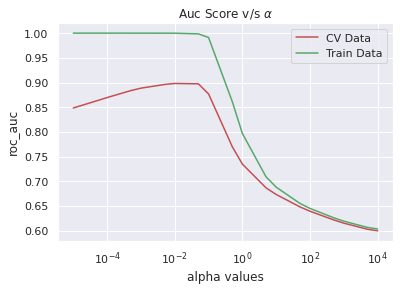

****************************************************************************************************


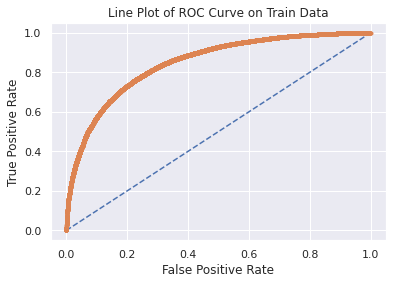

****************************************************************************************************


In [39]:
best_alpha_bow = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.8945973643871522
**********************************************************************


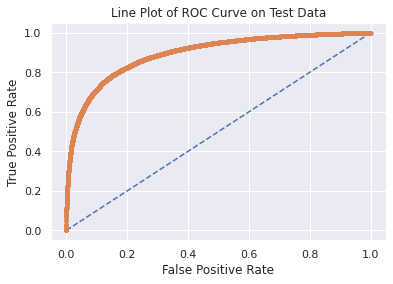

macro f1 score for data : 0.7458678716042675
micro f1 score for data: 0.8844828381975107
hamming loss for data: 0.11551716180248926
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.63      0.50      0.56     18845
           1       0.92      0.95      0.93    111153

    accuracy                           0.88    129998
   macro avg       0.77      0.73      0.75    129998
weighted avg       0.88      0.88      0.88    129998

**********************************************************************


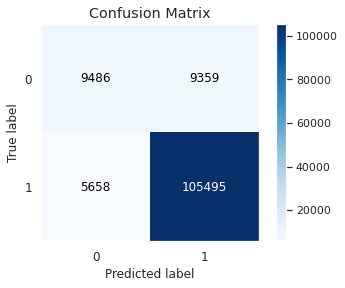

In [40]:
NB_bow, roc_auc_bow = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_bow)

In [41]:
Important_features(BOW, NB_bow)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,like,-5.036708,like,-4.992474
1,great,-5.201309,taste,-5.445899
2,good,-5.250619,product,-5.505941
3,love,-5.412882,would,-5.506159
4,one,-5.503098,one,-5.619753
...,...,...,...,...
3713294,lady pointed,-18.478790,picture shipping,-16.888361
3713295,lady poster,-18.478790,picture shiny,-16.888361
3713296,lady preach,-18.478790,picture sharpei,-16.888361
3713297,lady pregnant,-18.478790,picture shared,-16.888361


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfIdf, X = Text_Into_Vector(TfidfVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (393931, 3713299)
the number of unique words including both unigrams and bigrams  3713299


In [43]:
TfIdf.get_feature_names()[:20]

['aaa',
 'aaa aaa',
 'aaa able',
 'aaa class',
 'aaa cola',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa plus',
 'aaa rating',
 'aaa tue',
 'aaaa',
 'aaaaaaaaagghh',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaaah',
 'aaaaaah melt',
 'aaaaaahhh']

In [44]:
TfIdf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [45]:
X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])

In [46]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (129998, 3713299) (129998,)
X_tr, Y_tr (176835, 3713299) (176835,)
X_cv, Y_cv (87098, 3713299) (87098,)
X_Train, Y_Train (263933, 3713299) (263933,)


In [47]:
X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)

Train Data Size  (176835, 3713299)
CV Data Size:  (87098, 3713299)
Test Data Size:  (129998, 3713299)


10000  ------>  0.621896847364178
5000  ------>  0.6224806979188591
1000  ------>  0.6263615535986797
500  ------>  0.6299799595898926
100  ------>  0.6455921730109432
50  ------>  0.6559521747032223
10  ------>  0.6876209115407594
5  ------>  0.7046275717649365
1  ------>  0.7605341536415536
0.5  ------>  0.7967232905612948
0.1  ------>  0.8729019977686556
0.05  ------>  0.8783809764739736
0.01  ------>  0.8710021615144419
0.005  ------>  0.8682608615291165
0.001  ------>  0.8587657250507399
0.0005  ------>  0.853065461813482
0.0001  ------>  0.8383403477285398
5e-05  ------>  0.8319958073302832
1e-05  ------>  0.8182511792999595
****************************************************************************************************

 Best alpha Value 0.05 with highest roc_auc Score is 0.8783809764739736
****************************************************************************************************


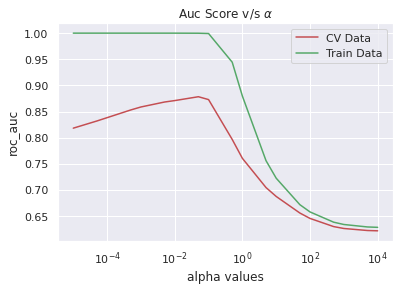

****************************************************************************************************


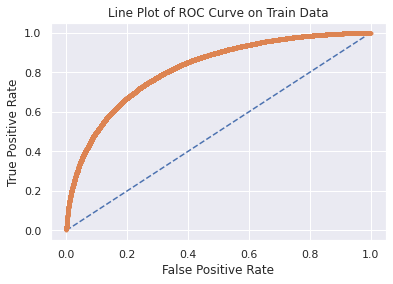

****************************************************************************************************


In [48]:
best_alpha_idf = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.8751801821442953
**********************************************************************


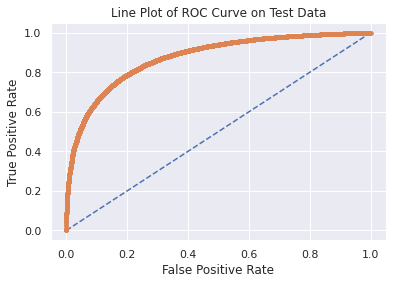

macro f1 score for data : 0.6887201806827472
micro f1 score for data: 0.8805520084924383
hamming loss for data: 0.11944799150756165
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.68      0.33      0.44     18845
           1       0.90      0.97      0.93    111153

    accuracy                           0.88    129998
   macro avg       0.79      0.65      0.69    129998
weighted avg       0.86      0.88      0.86    129998

**********************************************************************


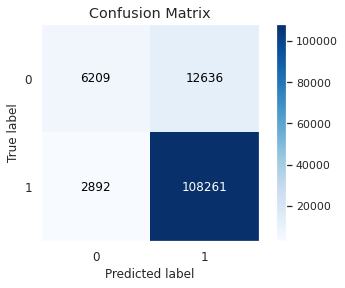

In [49]:
NB_tfidf, roc_auc_idf = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_idf)

In [50]:
Important_features(TfIdf, NB_tfidf)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,like,-6.407410,like,-6.783601
1,great,-6.421787,taste,-7.046977
2,good,-6.503957,product,-7.081092
3,love,-6.581528,would,-7.096350
4,coffee,-6.733019,one,-7.286380
...,...,...,...,...
3713294,priced sulfer,-16.963449,picture shipping,-15.783283
3713295,form bouncing,-16.963449,picture shiny,-15.783283
3713296,form box,-16.963449,picture sharpei,-15.783283
3713297,form boxed,-16.963449,picture shared,-15.783283


In [51]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperameter(alpha)","Test Auc Score"]

####################################################################################
x.add_row(["BoW","MultinomialNB",best_alpha_bow, roc_auc_bow])
x.add_row(["Tf-Idf","MultinomialNB",best_alpha_idf, roc_auc_idf])

####################################################################################
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
####################################################################################
printmd('****Final Conclusion for MultiNomialNB Model:****')
print(x)

****Final Conclusion for MultiNomialNB Model:****

+------------+---------------+--------------------+--------------------+
| Vectorizer |     Model     | Hyperameter(alpha) |   Test Auc Score   |
+------------+---------------+--------------------+--------------------+
|    BoW     | MultinomialNB |        0.01        | 0.8945973643871522 |
|   Tf-Idf   | MultinomialNB |        0.05        | 0.8751801821442953 |
+------------+---------------+--------------------+--------------------+


In [52]:
review = """Great, healthier alternative to the usual bhujia we Indians are used to having along with our tea or our beer.
            Much less salt than traditional tea snacks as well. I love the variety of texture as well with the very 
            crunchy peas to soft cheese bits, the sesame seed coated snack to good old roasted peanuts. It is pretty 
            expensive though, at 600rs at a kilo perhaps the most expensive tea snack Ive ever had."""

print("Prediction using BOW:", Individual_Prediction(BOW, NB_bow, review))
print("Prediction using TF-Idf:", Individual_Prediction(TfIdf, NB_tfidf, review))

Prediction using BOW: positive review
Prediction using TF-Idf: positive review
